In [1]:
%load_ext autoreload
%autoreload 2

In [14]:

import scipy.signal
import numpy
import pandas

from iir import butter2_lowpass


In [15]:

rng = numpy.random.default_rng()
noise = rng.uniform(-1.0, +1.0, size=256)
noise
None

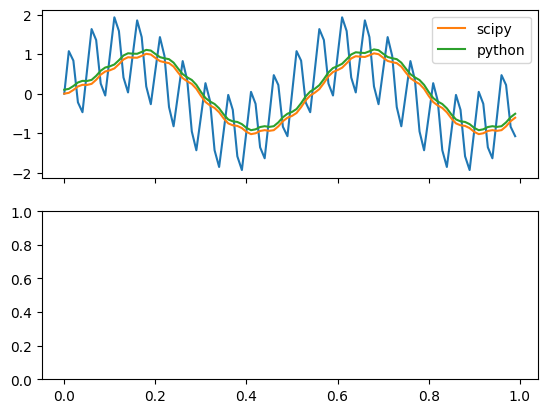

In [23]:
from iir import IIRFilter

from matplotlib import pyplot as plt

def make_two_sines(f1 = 2.0, f2 = 20.0, sr = 100, dur = 1.0):
    np = numpy

    t = np.linspace(0, 1, int(dur*sr), False)
    sig = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

    return t, sig

sr = 100
t, sig = make_two_sines(sr=sr)
numpy.save('sines-input.npy', sig)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)

lp = butter2_lowpass(5.0, sr=sr)
lp

filtered = scipy.signal.sosfilt(lp, sig)
ax1.plot(t, filtered, label='scipy')

filt2 = sig.copy()
IIRFilter(lp).process(filt2)
filt2 = filt2 + 0.1
ax1.plot(t, filt2, label='python')
ax1.legend()


[[ 8.53159526e-10  1.70631905e-09  8.53159526e-10  1.00000000e+00
  -1.88191355e+00  8.85634416e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.91119707e+00  9.14975835e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.96413357e+00  9.68017003e-01]]
[[0.0009446918438401509, 0.0018893836876803017, 0.0009446918438401509, 1.0, -1.9111970674260732, 0.9149758348014339], [0.0009446918438401509, 0.0018893836876803017, 0.0009446918438401509, 1.0, -1.9111970674260732, 0.9149758348014339], [0.0009446918438401509, 0.0018893836876803017, 0.0009446918438401509, 1.0, -1.9111970674260732, 0.9149758348014339]]


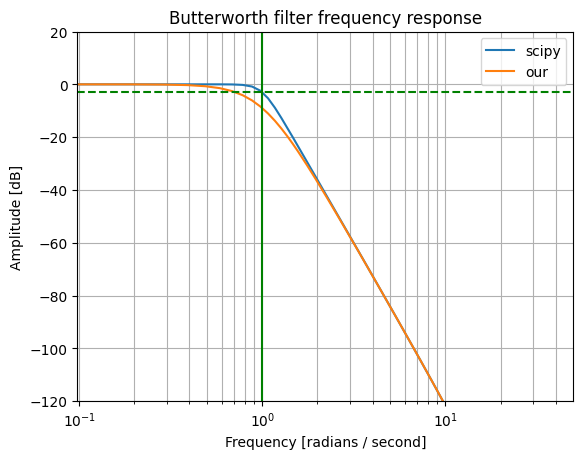

In [21]:

def plot_frequency_response(filters : dict, sr, cutoff=None):
    import scipy.signal
    import numpy
    from matplotlib import pyplot as plt

    for name, sos in filters.items():
        b, a = scipy.signal.sos2tf(sos)
        w, h = scipy.signal.freqz(b, a, fs=sr)
        plt.semilogx(w, 20 * numpy.log10(abs(h)), label=name)

    plt.title('Butterworth filter frequency response')
    plt.xlabel('Frequency [radians / second]')
    plt.ylabel('Amplitude [dB]')
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    plt.legend()
    plt.ylim(-120, 20)

    if cutoff is not None:
        plt.axvline(cutoff, color='green')
        plt.axhline(-3.0, color='green', ls='--')

    plt.show()

sr = 100
cutoff = 1.0

import scipy.signal

ref = scipy.signal.butter(6, cutoff, btype='low', analog=False, output='sos', fs=sr)
sos = [
    butter2_lowpass(cutoff, sr),
    butter2_lowpass(cutoff*1.0, sr),
    butter2_lowpass(cutoff*1.0, sr),
]

print(ref)
print(sos)

plot_frequency_response({'scipy': ref, 'our': sos}, sr=sr, cutoff=cutoff)
